# Dust Data 2/8/24 - Test Site:

### Interactive Graph:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

<IPython.core.display.Javascript object>


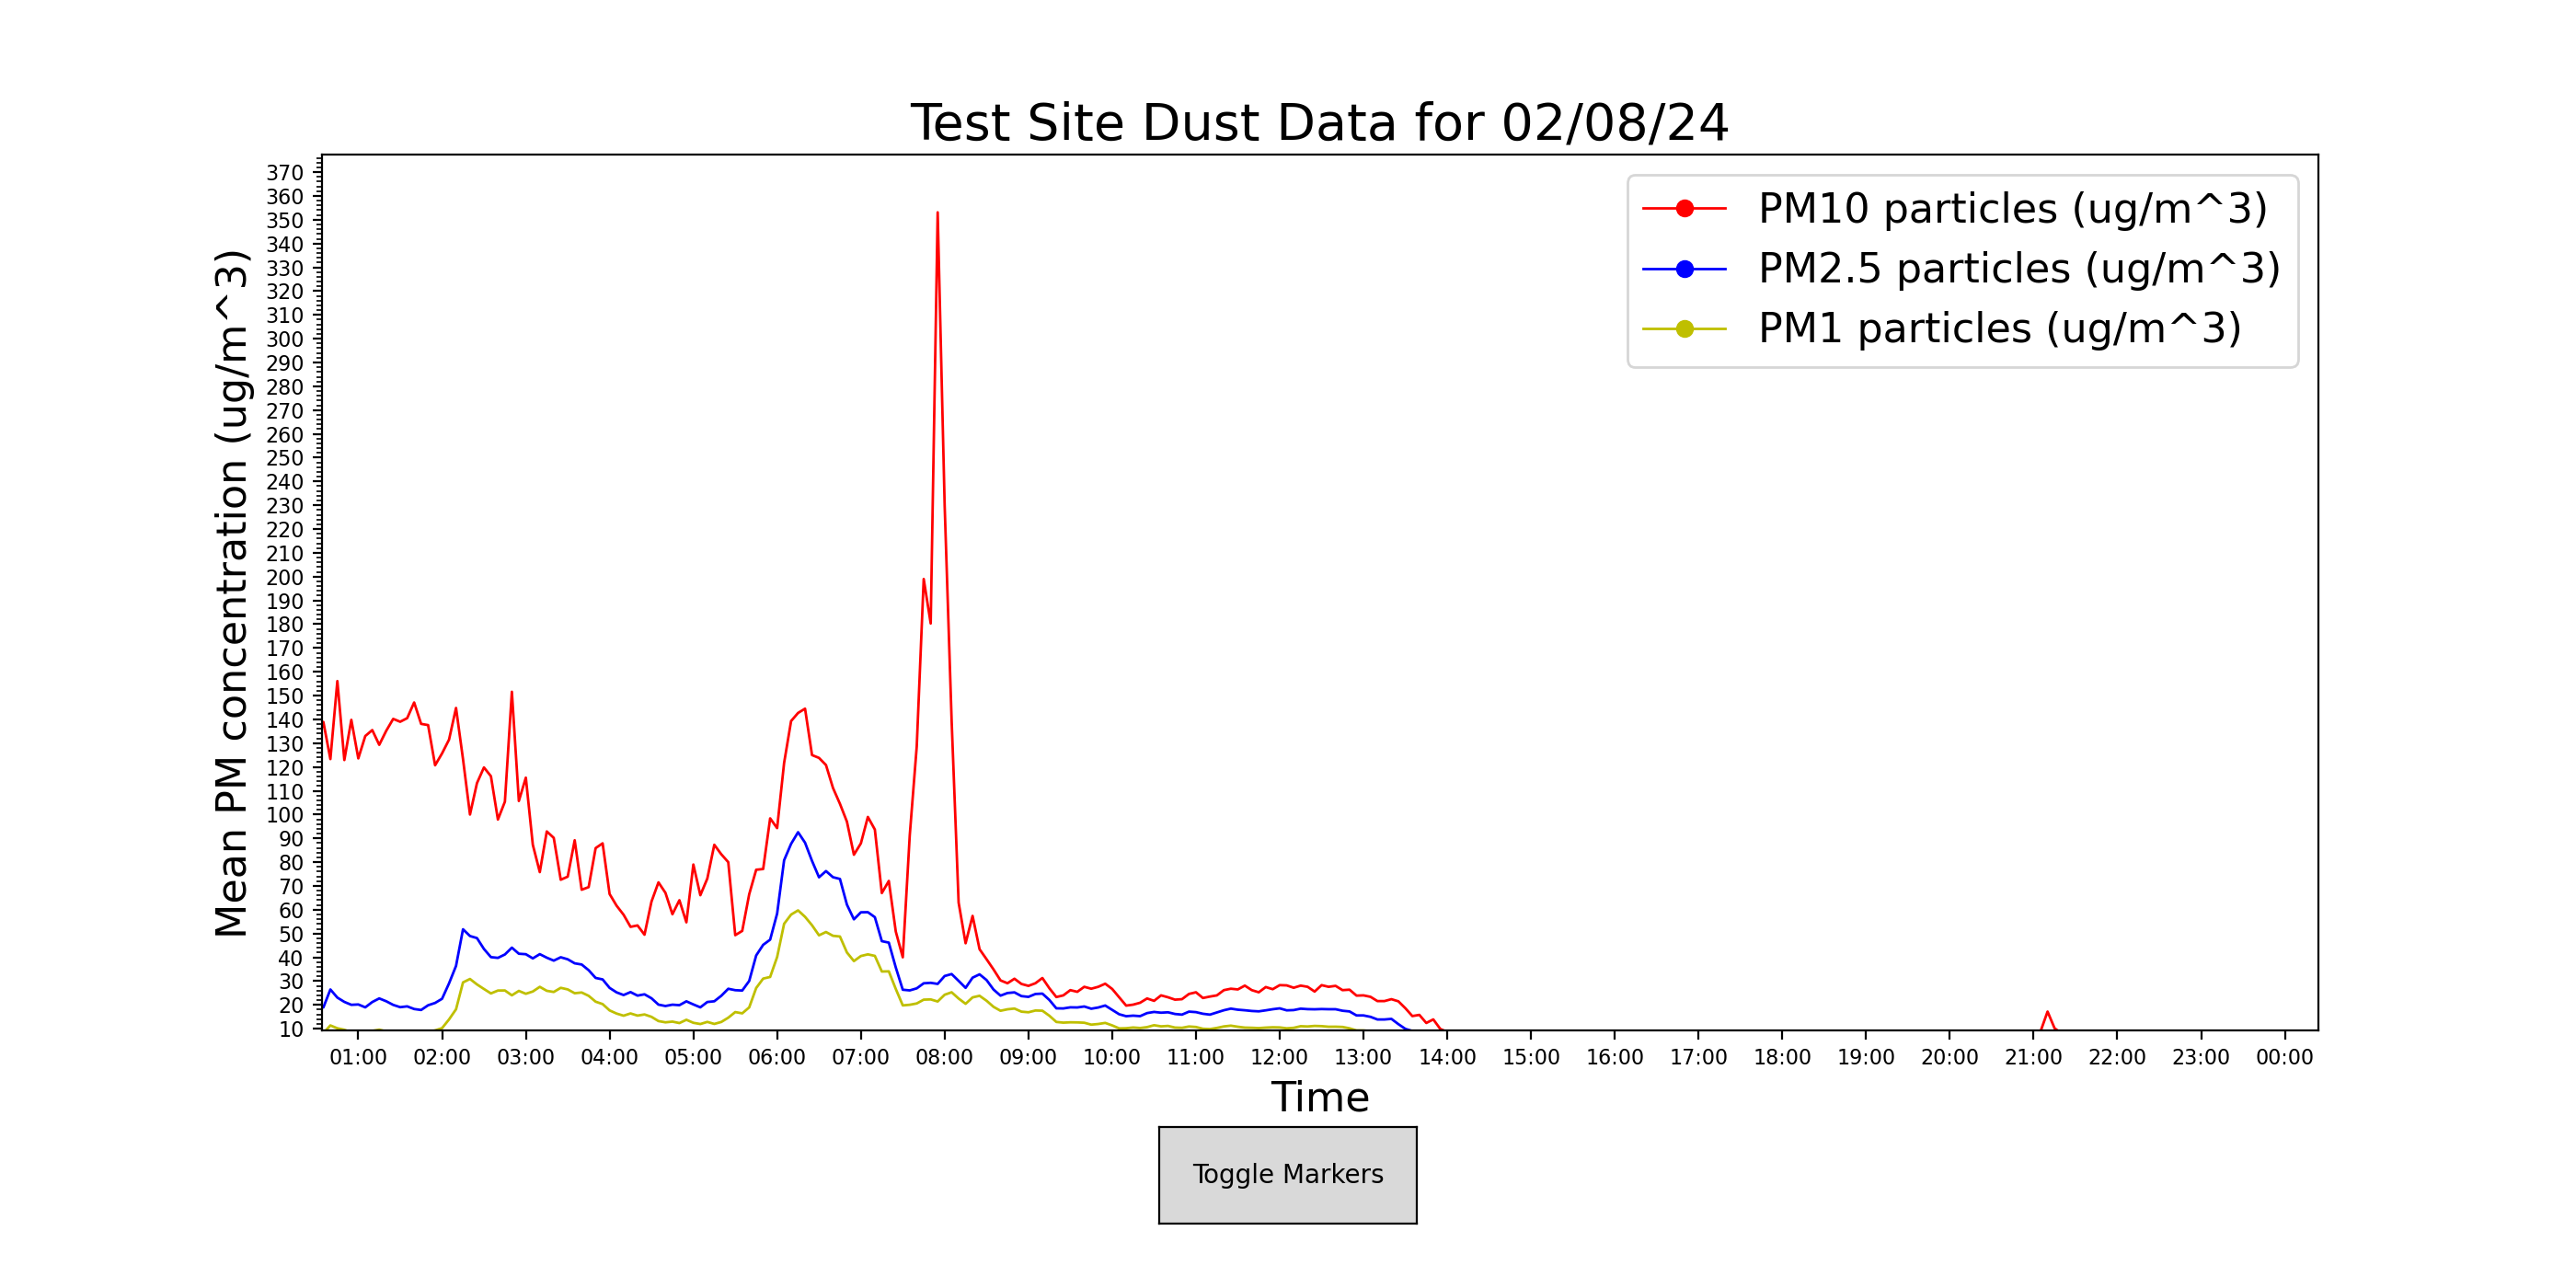

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.widgets import Button

%matplotlib notebook

file_path = '/Users/ahmad/Documents/NERC Internship/Excel/Actual Data/Dust/2:8:24/Data_HIRE4573_1722639792113 - Test Site.xlsx'
df = pd.read_excel(file_path, sheet_name='Data_HIRE4573_1722639792113', engine='openpyxl')

fig, ax = plt.subplots(figsize=(14, 7)) 
plt.subplots_adjust(bottom=0.2)

line1, = ax.plot(df['Date Time'], df['PM10 particles (ug/m^3)'], linewidth=1, label='PM10 particles (ug/m^3)', color="r", marker='o')
line2, = ax.plot(df['Date Time'], df['PM2.5 particles (ug/m^3)'], linewidth=1, label='PM2.5 particles (ug/m^3)', color="b", marker='o')
line3, = ax.plot(df['Date Time'], df['PM1 particles (ug/m^3)'], linewidth=1, label='PM1 particles (ug/m^3)', color="y", marker='o')

ax.set_title('Test Site Dust Data for 02/08/24', fontsize=20)
ax.set_xlabel('Time', fontsize=16)
ax.set_ylabel('Mean PM concentration (ug/m^3)', fontsize=16)
ax.legend(fontsize=16)

ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)

start_time = df['Date Time'].min()
end_time = df['Date Time'].max()
ax.set_xlim(start_time, end_time)

ax.set_ylim(0, df[['PM10 particles (ug/m^3)', 'PM2.5 particles (ug/m^3)', 'PM1 particles (ug/m^3)']].max().max() + 15)

hour_locator = mdates.HourLocator(interval=1)
ax.xaxis.set_major_locator(hour_locator)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

ax.yaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_minor_locator(plt.MultipleLocator(2))

def toggle_markers(event):
    current_marker = line1.get_marker()
    new_marker = 'o' if current_marker == 'None' else 'None'
    line1.set_marker(new_marker)
    line2.set_marker(new_marker)
    line3.set_marker(new_marker)
    plt.draw()

ax_button = plt.axes([0.45, 0.05, 0.1, 0.075])
btn = Button(ax_button, 'Toggle Markers')
btn.on_clicked(toggle_markers)

plt.show()